In [1]:
import pandas as pd
import numpy as np
from itertools import chain
import datetime as dt

import matplotlib
import matplotlib.patches as patches
from matplotlib import font_manager
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as md
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.collections import PatchCollection
from matplotlib.colors import rgb2hex
from pySankey.sankey import sankey
import seaborn as sns

import time
import string
import warnings
warnings.filterwarnings('ignore')

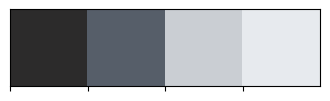

In [2]:
# Define chart color palette
chart = ['#2C2B2B','#565E69','#CACED3','#E7EAEE']
sns.palplot(sns.color_palette(chart))

In [5]:
# Define constants
figure_size = (16,9)

# # Define x-axis range
# left = dt.date(2005, 1, 1)
# right = dt.date(2023, 9, 1)
# Add every font at the specified location
font_dir = ['/Users/haileyrobertson/Library/Fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    

# Set background
sns.set_context('talk') #change the size from small to medium
sns.set_style('white') #change bg to white

# Set font family globally
plt.rcParams['font.family'] = 'Open Sans'
plt.rcParams['font.weight'] = 'bold'

# Set margins
plt.rcParams['axes.xmargin'] = 0.2

# Define list of date formats
zfmts = ['', '%Y','%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']

# Format axes 
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.titlepad'] = 30

# Format ticks
plt.rcParams["xtick.direction"] = "out"
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.color'] = chart[2]
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.labelcolor'] = chart[1]
plt.rcParams['xtick.labelsize'] = 24

plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.pad"] = -35
plt.rcParams["ytick.minor.pad"] = -35
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["ytick.minor.size"] = 10
plt.rcParams["ytick.color"] = chart[2]
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.labelcolor"] = chart[1]
plt.rcParams["ytick.labelsize"] = 24


# Adjust fontdict for title
titlefont = {'family': 'Open Sans',
             'color':  chart[0], 
             'weight': 400,
             'size': 28}

# Set grid style
plt.rcParams['grid.color'] = chart[2]
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['grid.linewidth']=0.7

# Set legend style
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125

# Set axis labels
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.labelcolor'] = chart[1]

# Figure 1

## 1a - Total capacity funding (specified vs. unspecified)

In [6]:
# Load data
fig1a = pd.read_csv('analyses/Disbursed funds by year/results/Disbursed funds by year.csv')

# Clean data, converting year from numeric to datetime, and dropping the calculated columns
fig1a['Year'] = pd.to_datetime(fig1a['Year'], format='%Y').dt.year
fig1a['Date'] = pd.to_datetime(fig1a['Year'].astype(str) + '-01-01')

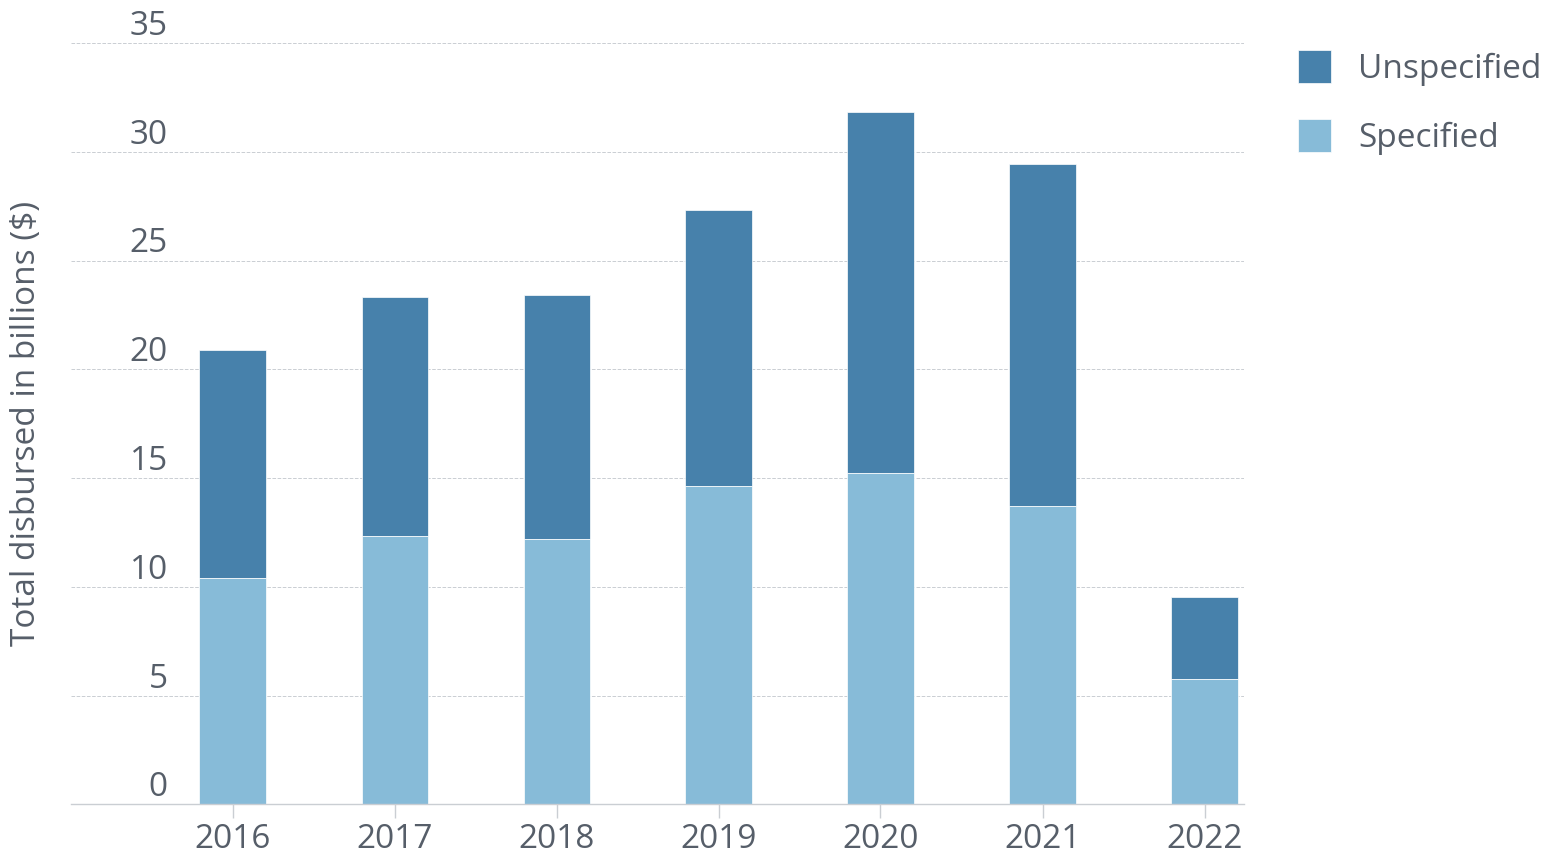

In [15]:
# Format figure
fig, ax = plt.subplots(figsize=(16,9))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=fig1a['Date']
y1=fig1a['Specified']
y2=fig1a['Unspecified']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
bar_width = 150
plt.bar(x, y2, bottom=y1, linewidth=0.5, width=bar_width, align="center", color='#4781AB', label='Unspecified')
plt.bar(x, y1, bottom=0, linewidth=0.5, width=bar_width, align="center", color='#87BBD8', label='Specified')

# ax.xaxis_date()

# Define x-axis range
left = dt.date(2015,1,1)
right = dt.date(2022,4,1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,35e9)

# Set title
title = "Global disbursed funding for specified and unspecified capacity from 2016-2022"
# plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)
    
# Format y-axis label
plt.ylabel("Total disbursed in billions ($)", rotation=90,labelpad=20,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")


tick_values = plt.gca().get_yticks()
tick_labels = ['{:,.0f}'.format(y/1e9) if i == 7 else '{:,.0f}'.format(y/1e9) for i, y in enumerate(tick_values)]

plt.gca().set_yticklabels(tick_labels)

plt.gca().yaxis.set_tick_params(pad=-70) 

# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.02,1.03),labelcolor=chart[1],labelspacing=1,ncol=1)


plt.tight_layout()
# plt.show()
plt.savefig('figures/Fig1a.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

## 1b - Total capacity funding by WHO region (specified only)

In [20]:
# Load data
fig1b = pd.read_csv('analyses/Disbursed funds for capacity by WHO region by year/results/Disbursed funds for capacity by WHO region by year.csv')

# Clean data, converting year from numeric to datetime, and dropping the calculated columns
fig1b['Year'] = pd.to_datetime(fig1b['Year'], format='%Y').dt.year
fig1b['Date'] = pd.to_datetime(fig1b['Year'].astype(str) + '-01-01')

In [10]:
# Pivot the DataFrame to get total disbursed for each region in each year
fig1b = fig1b.pivot_table(index='Date', columns='Recipient WHO Region', values='Total disbursed (nominal USD)', aggfunc='sum', fill_value=0)

# Flatten the MultiIndex columns
fig1b.columns = [f'{region}' for region in fig1b.columns]

fig1b = fig1b.reset_index()

In [11]:
fig1b['Total'] = fig1b.sum(axis=1)

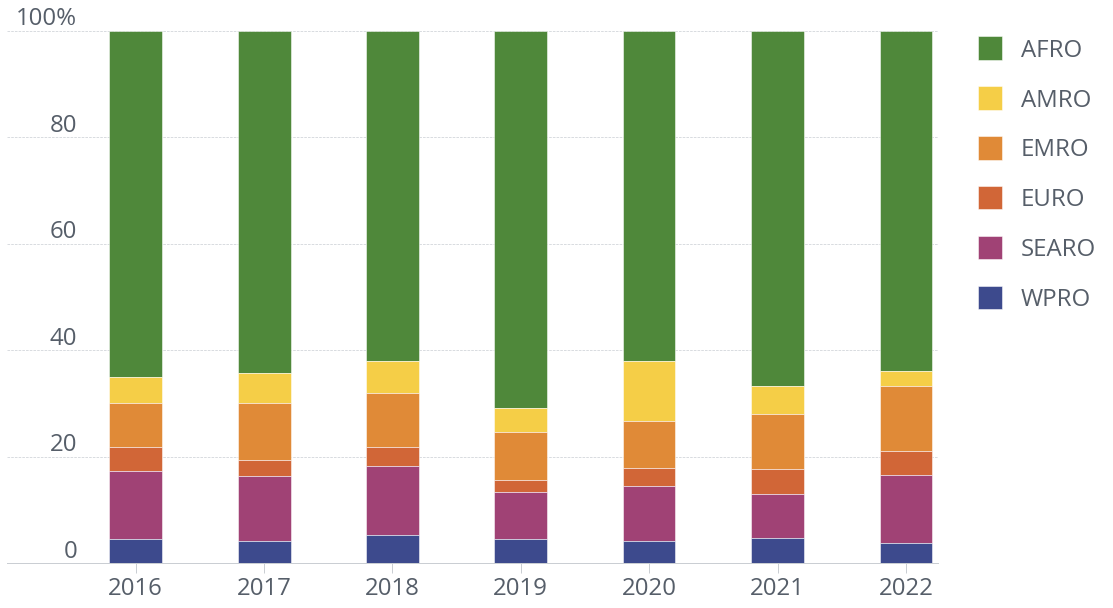

In [12]:
# Format figure
fig, ax = plt.subplots(figsize=(16,9))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=fig1b['Date']
y1=(fig1b['afro']/fig1b['Total'])*100 
y2=(fig1b['amro']/fig1b['Total'])*100 
y3=(fig1b['emro']/fig1b['Total'])*100 
y4=(fig1b['euro']/fig1b['Total'])*100 
y5=(fig1b['searo']/fig1b['Total'])*100 
y6 = (fig1b['wpro']/fig1b['Total'])*100 


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
bar_width = 150
plt.bar(x, y1, bottom=y6+y5+y4+y3+y2, linewidth=0.5, width=bar_width, align="center", color='#4F883A', label='AFRO')
plt.bar(x, y2, bottom=y6+y5+y4+y3, linewidth=0.5, width=bar_width, align="center", color='#F5CE47', label='AMRO')
plt.bar(x, y3, bottom=y6+y5+y4, linewidth=0.5, width=bar_width, align="center", color='#E08A37', label='EMRO')
plt.bar(x, y4, bottom=y6+y5, linewidth=0.5, width=bar_width, align="center", color='#D16637', label='EURO')
plt.bar(x, y5, bottom=y6, linewidth=0.5, width=bar_width, align="center", color='#A04275', label='SEARO')
plt.bar(x, y6, bottom=0, linewidth=0.5, width=bar_width, align="center", color='#3D4A8D', label='WPRO')



# ax.xaxis_date()

# Define x-axis range
left = dt.date(2015,1,1)
right = dt.date(2022,4,1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set title
title = "Disbursed funding for capacity by region, 2016-22"
# plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)
    
# Format y-axis label
plt.ylabel("", rotation=0,loc='top',labelpad=0,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")


tick_values = plt.gca().get_yticks()
tick_labels = ['{:,.0f}%'.format(y) if y == 100 else '{:,.0f}'.format(y) for i, y in enumerate(tick_values)]

plt.gca().set_yticklabels(tick_labels)

plt.gca().yaxis.set_tick_params(pad=-70) 

# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.02,1.03),labelcolor=chart[1],labelspacing=1,ncol=1)

plt.tight_layout(pad = 1.5)
# plt.show()
plt.savefig('figures/Fig1b.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait')

## 1c - Total capacity funding by core capacity (specified only)

In [13]:
# Load data
fig1c = pd.read_csv('analyses/Disbursed funds by core capacity by year/results/Disbursed funds by core capacity by year.csv')

# Clean data, converting year from numeric to datetime, and dropping the calculated columns
fig1c['Year'] = pd.to_datetime(fig1c['year'], format='%Y').dt.year
fig1c['Date'] = pd.to_datetime(fig1c['Year'].astype(str) + '-01-01')
fig1c = fig1c.fillna(0)

In [14]:
fig1c['Prevent'] = fig1c['P.1'] + fig1c['P.2'] + fig1c['P.3'] + fig1c['P.4'] + fig1c['P.5'] + fig1c['P.6'] + fig1c['P.7']
fig1c['Detect'] = fig1c['D.1'] + fig1c['D.2'] + fig1c['D.3'] + fig1c['D.4']
fig1c['Respond'] = fig1c['R.1'] + fig1c['R.2'] + fig1c['R.3'] + fig1c['R.4'] + fig1c['R.5'] 
fig1c['IHR Related Hazards'] = fig1c['CE'] + fig1c['RE'] + fig1c['PoE']
fig1c['Total'] = fig1c['Prevent'] + fig1c['Detect'] + fig1c['Respond'] + fig1c['IHR Related Hazards']


In [15]:
# Calculate percentages for each category
fig1c['Prevent (%)'] = (fig1c['Prevent'] / fig1c['Total']) * 100
fig1c['Detect (%)'] = (fig1c['Detect'] / fig1c['Total']) * 100
fig1c['Respond (%)'] = (fig1c['Respond'] / fig1c['Total']) * 100
fig1c['IHR Related Hazards (%)'] = (fig1c['IHR Related Hazards'] / fig1c['Total']) * 100

# Calculate the average for each column
average_values = fig1c[['Prevent (%)', 'Detect (%)', 'Respond (%)', 'IHR Related Hazards (%)']].mean()

# Display the average values
print(average_values)

Prevent (%)                36.431687
Detect (%)                 38.696765
Respond (%)                23.631933
IHR Related Hazards (%)     1.239614
dtype: float64


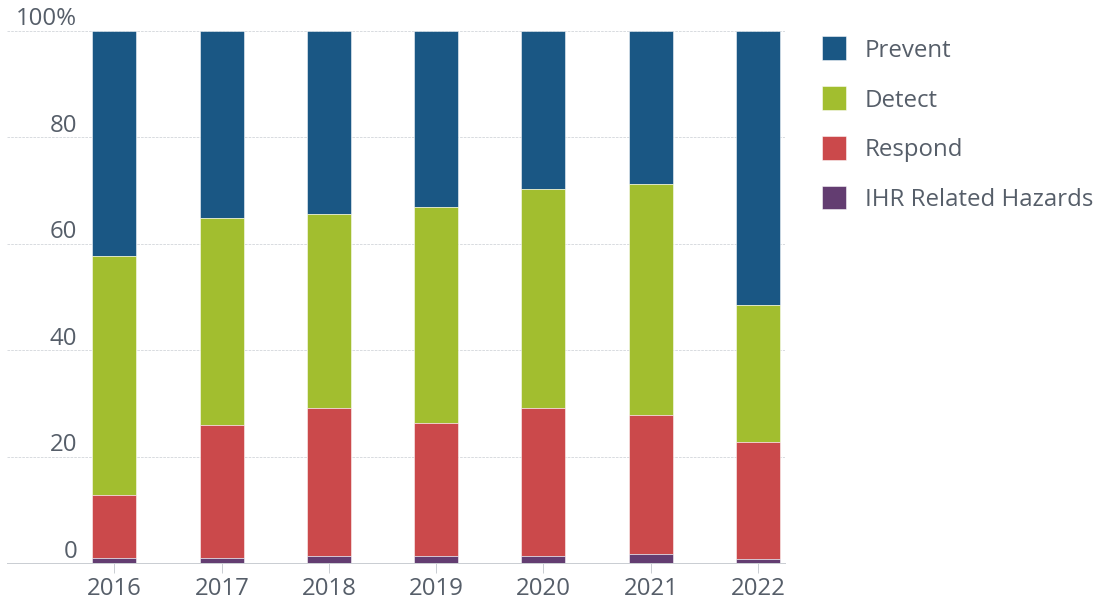

In [83]:
# Format figure
fig, ax = plt.subplots(figsize=(16,9))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=fig1c['Date']
y1=fig1c['Prevent (%)'] 
y2=fig1c['Detect (%)']
y3=fig1c['Respond (%)']
y4=fig1c['IHR Related Hazards (%)']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
bar_width = 150
plt.bar(x, y1, bottom=y4+y3+y2, linewidth=0.5, width=bar_width, align="center", color='#1A5784', label='Prevent')
plt.bar(x, y2, bottom=y4+y3, linewidth=0.5, width=bar_width, align="center", color='#A2BE2F', label='Detect')
plt.bar(x, y3, bottom=y4, linewidth=0.5, width=bar_width, align="center", color='#CB494B', label='Respond')
plt.bar(x, y4, bottom=0, linewidth=0.5, width=bar_width, align="center", color='#633D71', label='IHR Related Hazards')


# ax.xaxis_date()

# Define x-axis range
left = dt.date(2015,1,1)
right = dt.date(2022,4,1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set title
title = ""
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)
    
# Format y-axis label
plt.ylabel("", rotation=0,loc='top',labelpad=0,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")


tick_values = plt.gca().get_yticks()
tick_labels = ['{:,.0f}%'.format(y) if i == 5 else '{:,.0f}'.format(y) for i, y in enumerate(tick_values)]

plt.gca().set_yticklabels(tick_labels)

plt.gca().yaxis.set_tick_params(pad=-70) 

# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.02,1.03),labelcolor=chart[1],labelspacing=1,ncol=1)

plt.tight_layout(pad = 1.5)
plt.savefig('figures/Fig1c.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait')

In [30]:
fig1d = fig1c.copy()

# Extract the columns you want to calculate proportions for
columns_to_calculate = ['CE', 'D.1', 'D.2', 'D.3', 'D.4','P.1', 'P.2', 'P.3', 'P.4', 'P.5', 'P.6', 'P.7', 'PoE', 'R.1', 'R.2', 'R.3', 'R.4', 'R.5', 'RE']

# Calculate relative proportions for each column for each year
fig1d = fig1d.groupby('Date')[columns_to_calculate].apply(lambda x: x.div(x.sum(axis=1), axis=0) * 100)

fig1d['Date'] = pd.to_datetime(['2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01','2021-01-01','2022-01-01'])

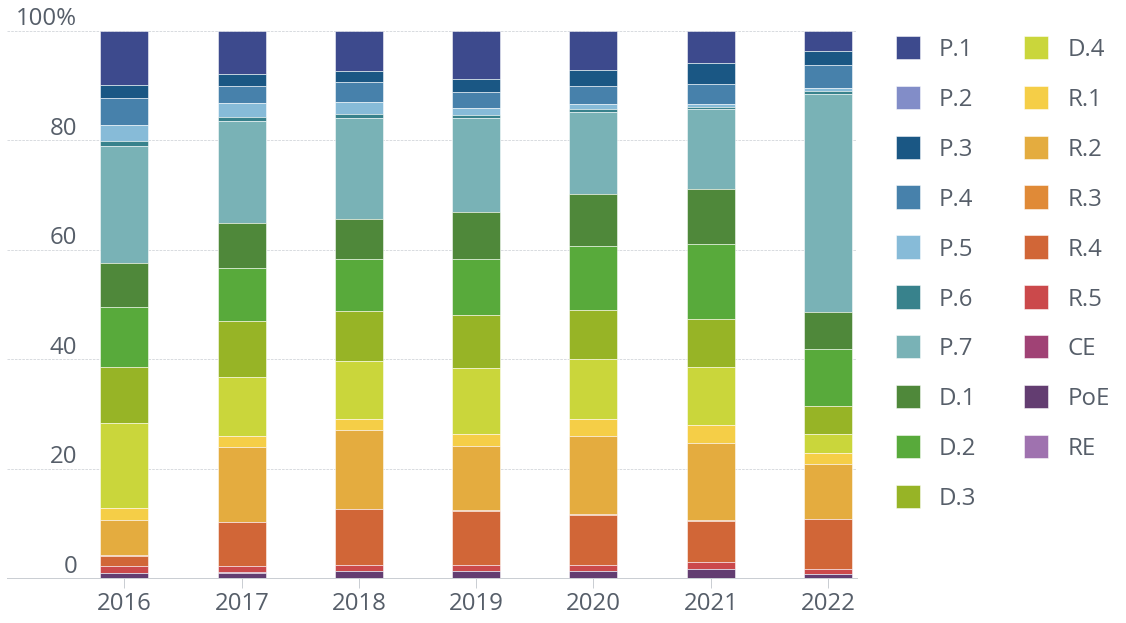

In [32]:
# Format figure
fig, ax = plt.subplots(figsize=(16,9))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=fig1d['Date']
y1=fig1d['P.1']
y2=fig1d['P.2']
y3=fig1d['P.3']
y4=fig1d['P.4']
y5=fig1d['P.5']
y6=fig1d['P.6']
y7=fig1d['P.7']
y8= fig1d['D.1']
y9 = fig1d['D.2']
y10 =fig1d['D.3']
y11 =fig1d['D.4']
y12 =fig1d['R.1']
y13 =fig1d['R.2']
y14 =fig1d['R.3']
y15 =fig1d['R.4']
y16 =fig1d['R.5']
y17 =fig1d['CE']
y18 =fig1d['PoE']
y19 =fig1d['RE']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
bar_width = 150
plt.bar(x, y1, bottom=y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6+y5+y4+y3+y2, linewidth=0.5, width=bar_width, align="center", color='#3D4A8D', label='P.1')
plt.bar(x, y2, bottom=y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6+y5+y4+y3, linewidth=0.5, width=bar_width, align="center", color='#828DC8', label='P.2')
plt.bar(x, y3, bottom=y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6+y5+y4, linewidth=0.5, width=bar_width, align="center", color='#1A5784', label='P.3')
plt.bar(x, y4, bottom=y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6+y5, linewidth=0.5, width=bar_width, align="center", color='#4781AB', label='P.4')
plt.bar(x, y5, bottom=y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6, linewidth=0.5, width=bar_width, align="center", color='#87BBD8', label='P.5')
plt.bar(x, y6, bottom=y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7, linewidth=0.5, width=bar_width, align="center", color='#38828C', label='P.6')
plt.bar(x, y7, bottom=y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8, linewidth=0.5, width=bar_width, align="center", color='#79B2B6', label='P.7')
plt.bar(x, y8, bottom=y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9, linewidth=0.5, width=bar_width, align="center", color='#4F883A', label='D.1')
plt.bar(x, y9, bottom=y19+y18+y17+y16+y15+y14+y13+y12+y11+y10, linewidth=0.5, width=bar_width, align="center", color='#58AA3B', label='D.2')
plt.bar(x, y10, bottom=y19+y18+y17+y16+y15+y14+y13+y12+y11, linewidth=0.5, width=bar_width, align="center", color='#97B426', label='D.3')
plt.bar(x, y11, bottom=y19+y18+y17+y16+y15+y14+y13+y12, linewidth=0.5, width=bar_width, align="center", color='#CAD63B', label='D.4')
plt.bar(x, y12, bottom=y19+y18+y17+y16+y15+y14+y13, linewidth=0.5, width=bar_width, align="center", color='#F5CE47', label='R.1')
plt.bar(x, y13, bottom=y19+y18+y17+y16+y15+y14, linewidth=0.5, width=bar_width, align="center", color='#E4AC3F', label='R.2')
plt.bar(x, y14, bottom=y19+y18+y17+y16+y15, linewidth=0.5, width=bar_width, align="center", color='#E08A37', label='R.3')
plt.bar(x, y15, bottom=y19+y18+y17+y16, linewidth=0.5, width=bar_width, align="center", color='#D16637', label='R.4')
plt.bar(x, y16, bottom=y19+y18+y17, linewidth=0.5, width=bar_width, align="center", color='#CB494B', label='R.5')
plt.bar(x, y17, bottom=y19+y18, linewidth=0.5, width=bar_width, align="center", color='#A04275', label='CE')
plt.bar(x, y18, bottom=y19, linewidth=0.5, width=bar_width, align="center", color='#633D71', label='PoE')
plt.bar(x, y19, bottom=0, linewidth=0.5, width=bar_width, align="center", color='#9F72AF', label='RE')


# ax.xaxis_date()

# Define x-axis range
left = dt.date(2015,1,1)
right = dt.date(2022,4,1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set title
title = ""
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)
    
# Format y-axis label
plt.ylabel("", rotation=0,loc='top',labelpad=0,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")


tick_values = plt.gca().get_yticks()
tick_labels = ['{:,.0f}%'.format(y) if i == 5 else '{:,.0f}'.format(y) for i, y in enumerate(tick_values)]

plt.gca().set_yticklabels(tick_labels)

plt.gca().yaxis.set_tick_params(pad=-70) 

# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.02,1.03),labelcolor=chart[1],labelspacing=1,ncol=2)


plt.tight_layout()
# # plt.show()
plt.savefig('figures/Fig1d.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

# Figure 2

## 2a - Total response funding for PHEICs

In [16]:
fig2a = pd.read_csv('analyses/Flows by PHEIC/results/Flows by PHEIC year__latest.csv')
fig2a.drop_duplicates(subset=["Total Disbursed to Recipient", "Recipient Name","PHEIC Name","Year"], keep="first", inplace=True)
fig2a = fig2a[fig2a["Year"]!=2023]

In [17]:
fig2a = fig2a.groupby(['PHEIC Name']).sum("Total Disbursed to Recipient").reset_index()

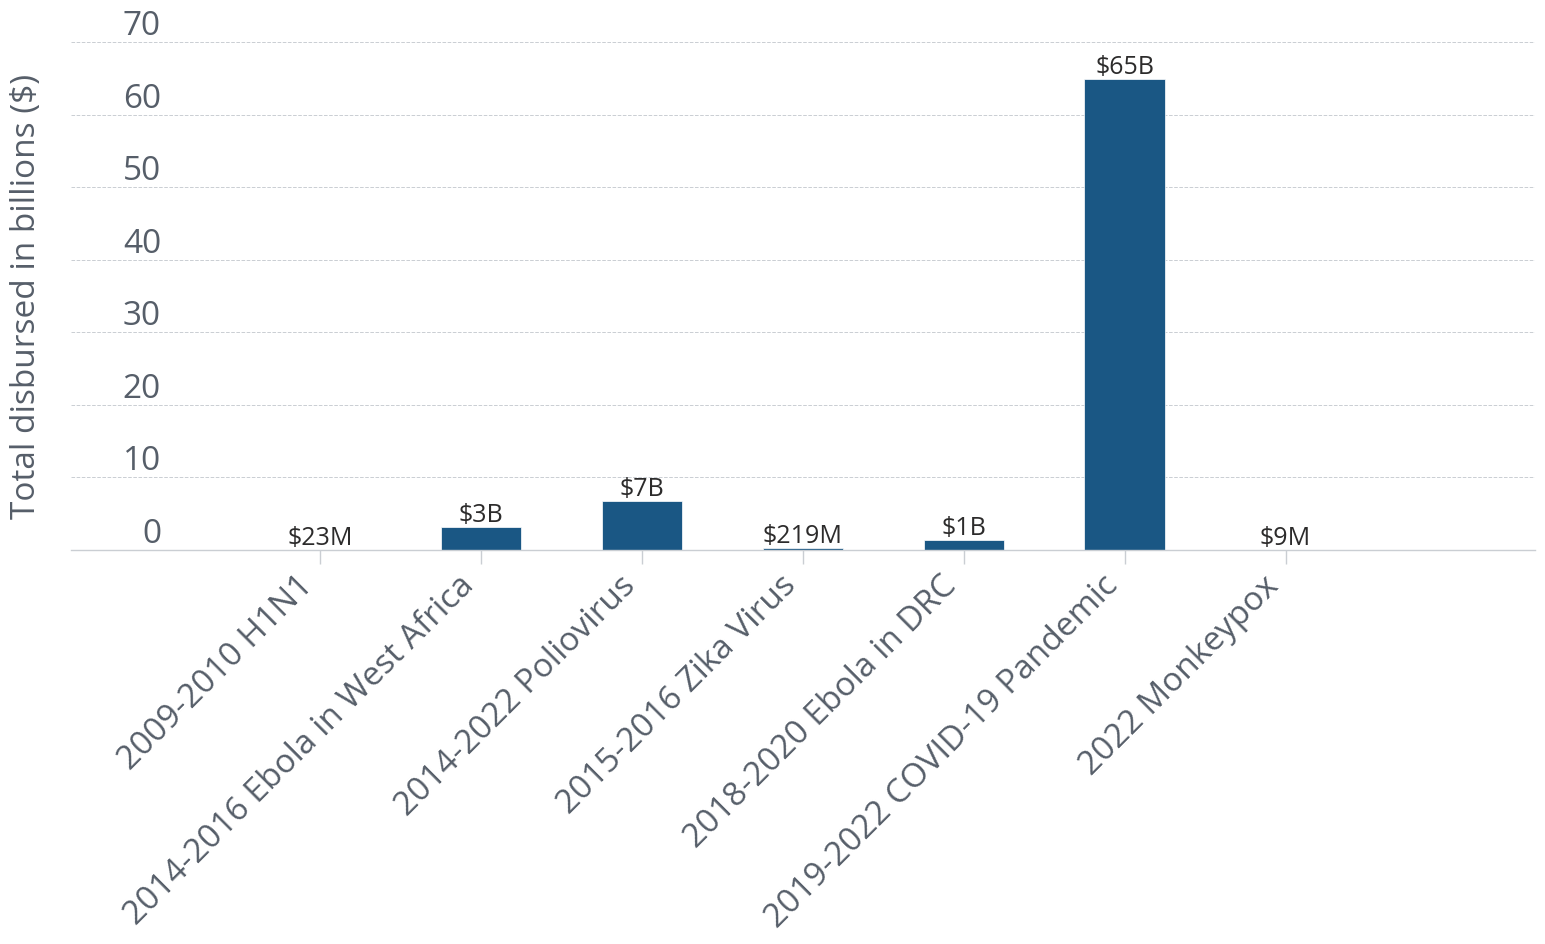

In [20]:
# Format figure
fig, ax = plt.subplots(figsize=(16,10))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=fig2a['PHEIC Name']
y=fig2a['Total Disbursed to Recipient']

bar_width=0.5

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
bars = plt.bar(x, y, linewidth=0.5, width=bar_width, align="center", color='#1A5784')

for bar in bars:
    value = bar.get_height()

    if abs(value) >= 1e9:
        formatted_value = '${:,.0f}B'.format(value / 1e9)
    elif abs(value) >= 1e6:
        formatted_value = '${:,.0f}M'.format(value / 1e6)
    else:
        formatted_value = '${:,.0f}'.format(value)

    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             formatted_value,
             ha='center', va='bottom', fontsize=18, color=chart[0])


# Changes y-axis range
plt.gca().set_ybound(0,70e9)

# Set title
title = "Total response funding disbursed by PHEIC (nominal USD)"
# plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
    
# Format y-axis label
plt.ylabel("Total disbursed in billions ($)", rotation=90,labelpad=20,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")


tick_values = plt.gca().get_yticks()
tick_labels = ['{:,.0f}'.format(y/1e9) if i ==7 else '{:,.0f}'.format(y/1e9) for i, y in enumerate(tick_values)]

plt.gca().set_yticklabels(tick_labels)

plt.gca().yaxis.set_tick_params(pad=-65) 

plt.tight_layout(pad = 1.5)
# plt.show()
plt.savefig('figures/Fig2a.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait')

## 2b - Total disbursed funding by relative proportion (specified, unspecified, response)

In [36]:
fig2b = fig1a.copy()
fig2b['Total'] = fig2b['Specified'] + fig2b['Unspecified'] + fig2b['Response']

In [37]:
fig2b.head()

,Year,Specified,Unspecified,Response,Date,Total
0,2016,10423004841,10475030071,1396388757,2016-01-01,22294423669
1,2017,12327371849,11000555799,926589840,2017-01-01,24254517488
2,2018,12196388317,11204156396,777650499,2018-01-01,24178195212
3,2019,14633276793,12699519125,1294438370,2019-01-01,28627234288
4,2020,15233027511,16609750678,24433930575,2020-01-01,56276708764


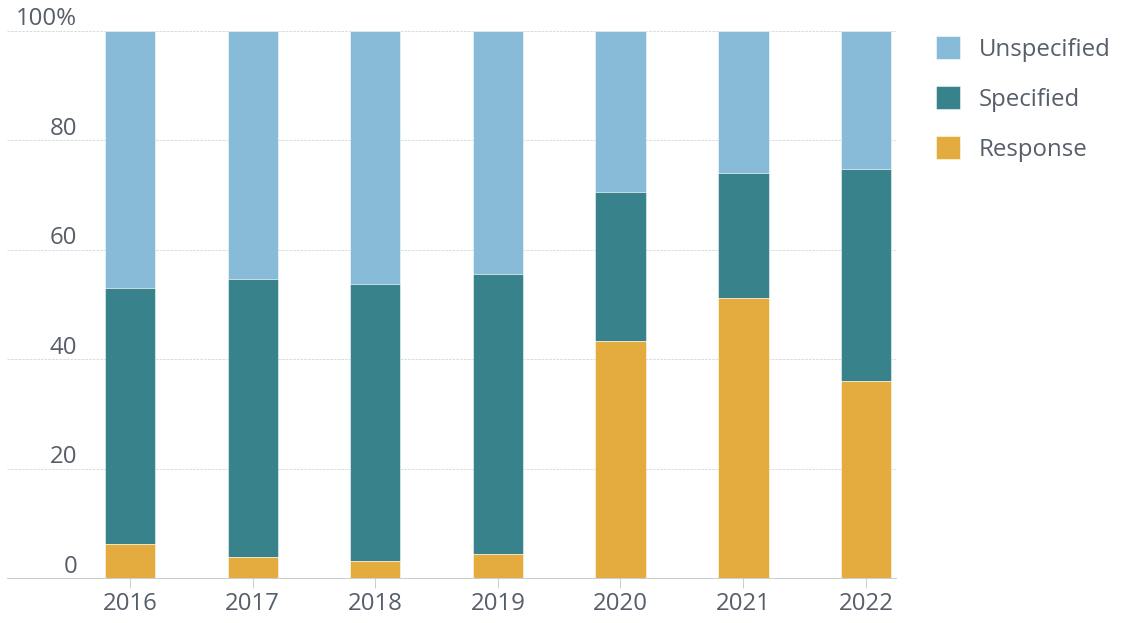

In [40]:
# Format figure
fig, ax = plt.subplots(figsize=(16,9))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=fig2b['Date']
y2= (fig2b['Specified']/fig2b['Total'])*100
y3=(fig2b['Unspecified']/fig2b['Total'])*100
y1 = (fig2b['Response']/fig2b['Total'])*100

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
bar_width = 150

plt.bar(x, y3, bottom=y2+y1, linewidth=0.5, width=bar_width, align="center", color='#87BBD8', label='Unspecified')
plt.bar(x, y2, bottom=y1, linewidth=0.5, width=bar_width, align="center", color='#38828C', label='Specified')
plt.bar(x, y1, bottom=0, linewidth=0.5, width=bar_width, align="center", color='#E4AC3F', label='Response')

# ax.xaxis_date()

# Define x-axis range
left = dt.date(2015,1,1)
right = dt.date(2022,4,1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set title
title = 'Relative proportion of funding disbursed by purpose from 2016-2022'
# plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)
    
# Format y-axis label
plt.ylabel("", rotation=0,loc='top',labelpad=0,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")


tick_values = plt.gca().get_yticks()
tick_labels = ['{:,.0f}%'.format(y) if i == 5 else '{:,.0f}'.format(y) for i, y in enumerate(tick_values)]

plt.gca().set_yticklabels(tick_labels)

plt.gca().yaxis.set_tick_params(pad=-70) 

# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.02,1.03),labelcolor=chart[1],labelspacing=1,ncol=1)


plt.tight_layout()
# plt.show()
plt.savefig('figures/Fig2b.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

## 2c - Relative proportion of  response funding during COVID-19 disbursed by WHO region

In [41]:
# Load data
fig2c = pd.read_csv('analyses/Disbursed funds for COVID response by WHO region by year/results/Disbursed funds for COVID response by WHO region by year.csv')

# Clean data, converting year from numeric to datetime, and dropping the calculated columns
fig2c['Year'] = pd.to_datetime(fig2c['Year'], format='%Y').dt.year
fig2c['Date'] = pd.to_datetime(fig2c['Year'].astype(str) + '-01-01')

In [42]:
# Pivot the DataFrame to get total disbursed for each region in each year
fig2c = fig2c.pivot_table(index='Date', columns='Recipient WHO Region', values='Total disbursed for COVID-19', aggfunc='sum', fill_value=0)

# Flatten the MultiIndex columns
fig2c.columns = [f'{region}' for region in fig2c.columns]

fig2c = fig2c.reset_index()

In [43]:
fig2c['Total'] = fig2c.sum(axis=1)

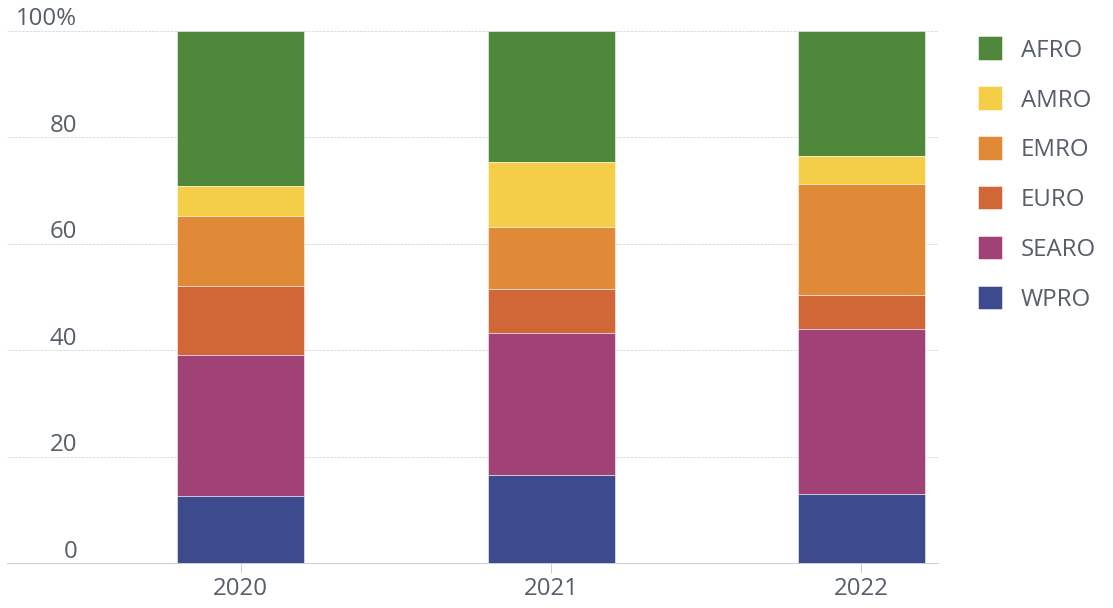

In [44]:
# Format figure
fig, ax = plt.subplots(figsize=(16,9))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=fig2c['Date']
y1=(fig2c['afro']/fig2c['Total'])*100 
y2=(fig2c['amro']/fig2c['Total'])*100 
y3=(fig2c['emro']/fig2c['Total'])*100 
y4=(fig2c['euro']/fig2c['Total'])*100 
y5=(fig2c['searo']/fig2c['Total'])*100 
y6 = (fig2c['wpro']/fig2c['Total'])*100 


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
bar_width = 150
plt.bar(x, y1, bottom=y6+y5+y4+y3+y2, linewidth=0.5, width=bar_width, align="center", color='#4F883A', label='AFRO')
plt.bar(x, y2, bottom=y6+y5+y4+y3, linewidth=0.5, width=bar_width, align="center", color='#F5CE47', label='AMRO')
plt.bar(x, y3, bottom=y6+y5+y4, linewidth=0.5, width=bar_width, align="center", color='#E08A37', label='EMRO')
plt.bar(x, y4, bottom=y6+y5, linewidth=0.5, width=bar_width, align="center", color='#D16637', label='EURO')
plt.bar(x, y5, bottom=y6, linewidth=0.5, width=bar_width, align="center", color='#A04275', label='SEARO')
plt.bar(x, y6, bottom=0, linewidth=0.5, width=bar_width, align="center", color='#3D4A8D', label='WPRO')



# ax.xaxis_date()

# Define x-axis range
left = dt.date(2019,4,1)
right = dt.date(2022,4,1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set title
title = "Disbursed response funding for COVID 19 by region, 2020-22"
# plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Set major locator for x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))

# Format the x-axis date labels
plt.xticks(ticks=x, labels=["2020","2021","2022"],rotation=0, ha="center")
    
# Format y-axis label
plt.ylabel("", rotation=0,loc='top',labelpad=0,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")


tick_values = plt.gca().get_yticks()
tick_labels = ['{:,.0f}%'.format(y) if y == 100 else '{:,.0f}'.format(y) for i, y in enumerate(tick_values)]
tick_values = plt.gca().get_yticks()
tick_labels = ['{:,.0f}%'.format(y) if y == 100 else '{:,.0f}'.format(y) for i, y in enumerate(tick_values)]

plt.gca().set_yticklabels(tick_labels)

plt.gca().yaxis.set_tick_params(pad=-70) 

# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.02,1.03),labelcolor=chart[1],labelspacing=1,ncol=1)

plt.tight_layout(pad = 1.5)
# plt.show()
# plt.savefig('figures/Fig2c.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait')

# Figure 3

In [3]:
fig3 = pd.read_csv('analyses/Disbursed funds by pathway/results/Disbursed funds by pathway.csv')

## 3a - Sankey from 2016-19

In [4]:
fig3a = fig3.copy()
fig3a['Percent (2016-2019)'] = round((fig3a['Total Value (2016-2019)'] / fig3a['Total Value (2016-2019)'].sum(axis=0)) * 100)
fig3a = fig3a.sort_values(by="Percent (2016-2019)",ascending=False)

In [5]:
fig3a.head()

,Funder,Recipient,Total Value (2016-2019),Total Value (2020-2022),Percent (2016-2019)
0,Country,Country,4.937922e+10,5.353014e+10,37.0
1,International,Country,4.258557e+10,7.431976e+10,32.0
2,Country,International,1.437118e+10,1.527274e+10,11.0
3,Country,Other,1.192557e+10,9.352234e+09,9.0
4,Philanthropy,Country,1.025215e+10,5.620300e+09,8.0


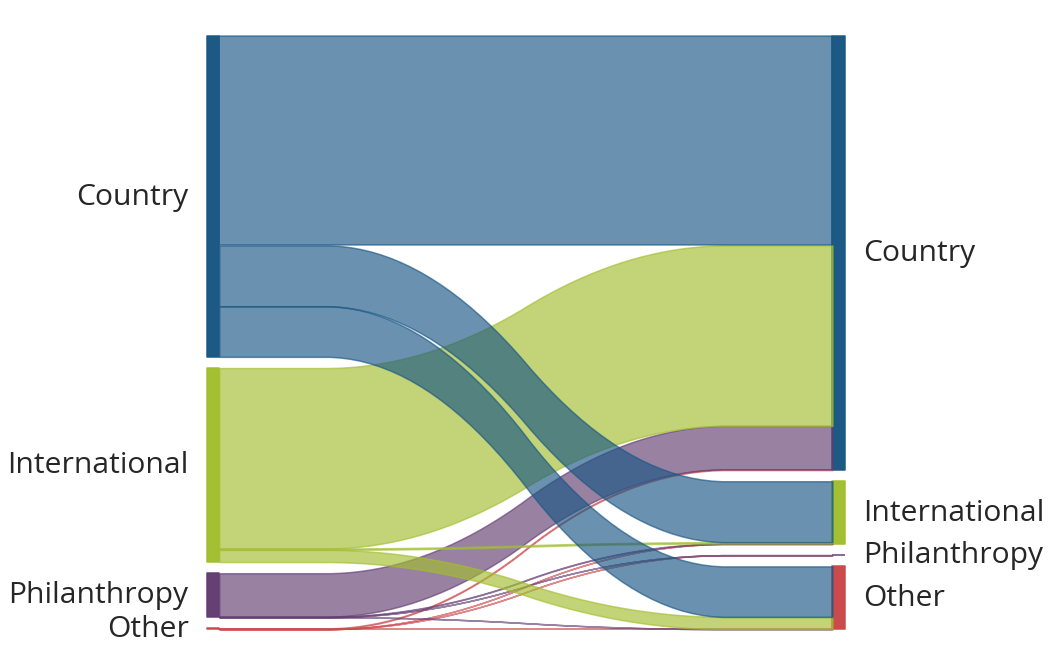

In [50]:
color_map = {
    'Country': '#1A5784',
    'International': '#A2BE2F',
    'Philanthropy': '#633D71',
    'Other': '#CB494B'

}


# Create the Sankey diagram
sankey(
    left=fig3a["Funder"], fontsize=30, leftLabels=["Other","Philanthropy","International","Country"], right=fig3a["Recipient"],rightLabels=["Other","Philanthropy","International","Country"],leftWeight=fig3a["Total Value (2016-2019)"], rightWeight=fig3a["Total Value (2016-2019)"], colorDict=color_map
)


fig = plt.gcf()

# Set size in inches
fig.set_size_inches(16, 12)

# Set the color of the background to white
fig.set_facecolor("w")



# plt.show()

plt.savefig('figures/Fig3a.png', dpi=1000, facecolor='w', 
            edgecolor='w', 
            orientation='portrait')

## 3b - Sankey from 2020-22

In [6]:
fig3b = fig3.copy()
fig3b['Percent (2020-2022)'] = round((fig3b['Total Value (2020-2022)'] / fig3b['Total Value (2020-2022)'].sum(axis=0)) * 100)
fig3b = fig3b.sort_values(by="Percent (2020-2022)",ascending=False)

In [7]:
fig3b.head()

,Funder,Recipient,Total Value (2016-2019),Total Value (2020-2022),Percent (2020-2022)
1,International,Country,4.258557e+10,7.431976e+10,46.0
0,Country,Country,4.937922e+10,5.353014e+10,33.0
2,Country,International,1.437118e+10,1.527274e+10,9.0
3,Country,Other,1.192557e+10,9.352234e+09,6.0
4,Philanthropy,Country,1.025215e+10,5.620300e+09,3.0


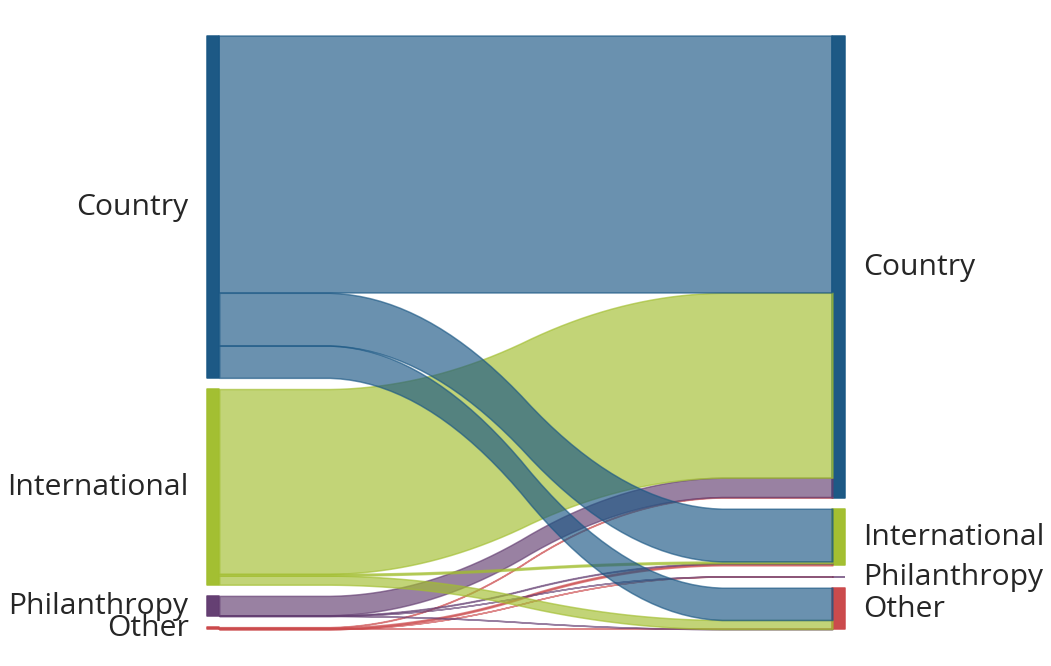

In [53]:
color_map = {
    'Country': '#1A5784',
    'International': '#A2BE2F',
    'Philanthropy': '#633D71',
    'Other': '#CB494B'

}


# Create the Sankey diagram
sankey(
    left=fig3b["Funder"], fontsize=30, leftLabels=["Other","Philanthropy","International","Country"], right=fig3b["Recipient"],rightLabels=["Other","Philanthropy","International","Country"],leftWeight=fig3b["Total Value (2020-2022)"], rightWeight=fig3b["Total Value (2020-2022)"], colorDict=color_map
)


fig = plt.gcf()

# Set size in inches
fig.set_size_inches(16, 12)

# Set the color of the background to white
fig.set_facecolor("w")



# plt.show()

plt.savefig('figures/Fig3b.png', dpi=1000, facecolor='w', 
            edgecolor='w', 
            orientation='portrait')